# DIGITAL VOICE SIMULATOR USING LIBROSA

## Importing Libraries

In [181]:
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from pydub import AudioSegment
from scipy.signal import find_peaks


## Defining Helper Functions 

In [87]:
def load_data(filepath):
    y, sr = librosa.load(filepath)
    return y, sr

In [88]:
## SHIFT PITCH FUNCTION
def shift_pitch(y, sr, step):
    # Define the desired pitch shift (in semitones)
    y_pitch_shifted = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=step)

    return y_pitch_shifted

In [89]:
## TIME STRECH FUNCTION
def stretch_time(y, speed_factor):
    y_stretched = librosa.effects.time_stretch(y=y, rate=speed_factor)

    return y_stretched

In [163]:
## ADJUST VOLUME FUNCTION
def adjust_volume(y, volume_factor):
    y_adjusted_volume = y * volume_factor

    return y_adjusted_volume

In [91]:
## DISTORTION FUNCTION
## adjust saturation as needed for distortion
def apply_distortion(y, saturation=0.1):
    y_distorted = np.tanh(saturation * y)

    return y_distorted

In [92]:
## NOISE REDUCTION FUNCTION
def spectral_subtraction(y, noise_level=0.02):
    # Perform spectral subtraction to reduce noise
    # Compute the short-time Fourier transform (STFT) of the audio
    stft = librosa.stft(y)
    
    # Calculate the magnitude and phase of the STFT
    magnitude = np.abs(stft)
    phase = np.angle(stft)
    
    # Estimate the noise magnitude using a noise level parameter
    noise_magnitude = noise_level * magnitude
    
    # Apply spectral subtraction
    cleaned_magnitude = np.maximum(magnitude - noise_magnitude, 0)
    
    # Reconstruct the cleaned audio using the modified magnitude and original phase
    cleaned_audio = librosa.istft(cleaned_magnitude * np.exp(1j * phase))
    
    return cleaned_audio

In [104]:
## ADD REVERB FUNCTION
def add_reverb(y, reverb_file='NaumburgBandshell.wav'):
    # Load a reverb impulse response
    reverb_impulse, _ = librosa.load(reverb_file)
    y_with_reverb = fftconvolve(in1=y, in2=reverb_impulse, mode='full')[:len(y)]

    return y_with_reverb

In [182]:
## APPLY COMPRESSION
def add_compression(filepath, y):
    audio = AudioSegment.from_file(filepath)
    threshold = -20  # Adjust this threshold value as needed
    ratio = 3  # Adjust this ratio value as needed
    # Convert the audio to a NumPy array
    samples = np.array(audio.get_array_of_samples())
    # Find peaks in the audio
    peaks, _ = find_peaks(np.abs(samples), height=threshold)
    # Apply compression to the peaks
    samples[peaks] *= ratio
    # Export the compressed audio using soundfile
    output_audio_file = filepath
    sf.write(output_audio_file, samples, audio.frame_rate)
    compressed_audio = AudioSegment(
        samples.tobytes(), frame_rate=audio.frame_rate, sample_width=samples.dtype.itemsize, channels=audio.channels
    )
    compressed_audio.export(filepath, format="wav")
    y, sr = load_data(filepath)
    return y, sr

In [93]:
## FILE SAVING FUNCTION
def save_audio(filename, y, sr):
    # Save the processed audio to a new file
    output_audio_file = f'modifiedAudio//{filename}.wav'
    sf.write(output_audio_file, y, sr)
    print("saved file to", output_audio_file)

In [101]:
## PLOTTING RAW VS MODIFIED AUDIO FUNCTION
def plot_vs(y, modified_y, sr, modified_sr, character):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.ylim(-0.8,0.8)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Original Voice")

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(modified_y, sr=modified_sr)
    plt.title(f"{character}-like Voice")
    plt.ylim(-0.8,0.8)
    plt.tight_layout()
    plt.show()
    

## Raw to Frieza Audio

In [98]:
def raw_to_frieza(filepath):
    y, sr = load_data(filepath)
    y = spectral_subtraction(y, noise_level=0.02)
    y = shift_pitch(y, sr, 1.6)
    y = stretch_time(y, 1.1)
    y = adjust_volume(y, 45.0)
    y = apply_distortion(y, 0.1)
    return y, sr

neal_path = 'originalAudio//neal_trial.wav'
frieza_y, frieza_sr = raw_to_frieza(neal_path)



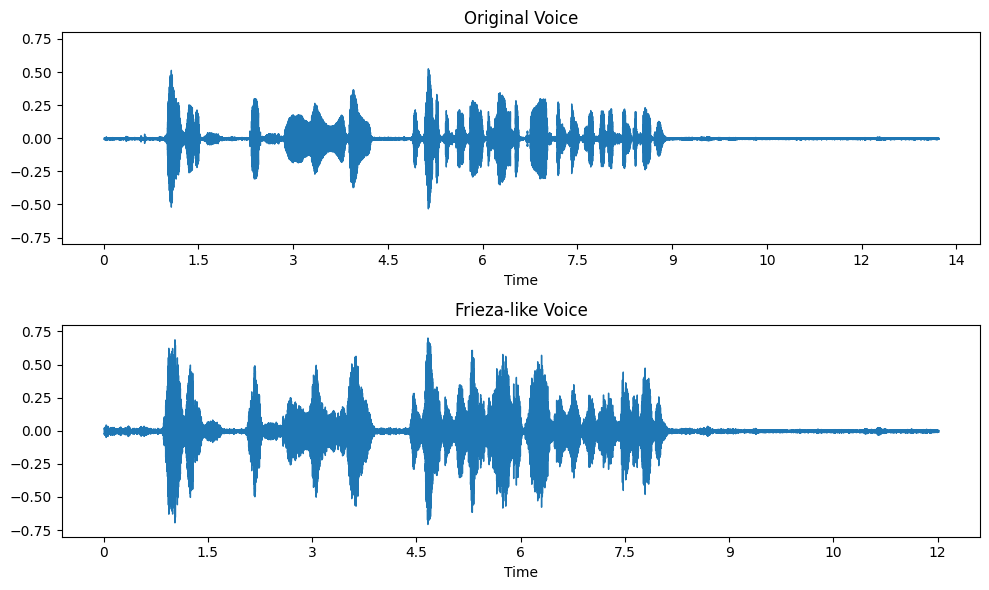

In [102]:
raw_y, raw_sr = load_data(neal_path)

plot_vs(raw_y, frieza_y, raw_sr, frieza_sr, "Frieza")

In [174]:
save_audio('frieza',frieza_y,frieza_sr)

saved file to modifiedAudio//frieza.wav


## Raw to Goku Audio

In [207]:
def raw_to_goku(filepath):
    y, sr = load_data(filepath)
    y = spectral_subtraction(y, noise_level=0.02)
    y = shift_pitch(y, sr, 0.5)
    # y = stretch_time(y, 1.1)
    y = add_reverb(y)
    y = adjust_volume(y, 120.0)
    y = apply_distortion(y, 0.01)
    return y, sr

neal_path = 'originalAudio//neal_trial.wav'
goku_y, goku_sr = raw_to_goku(neal_path)



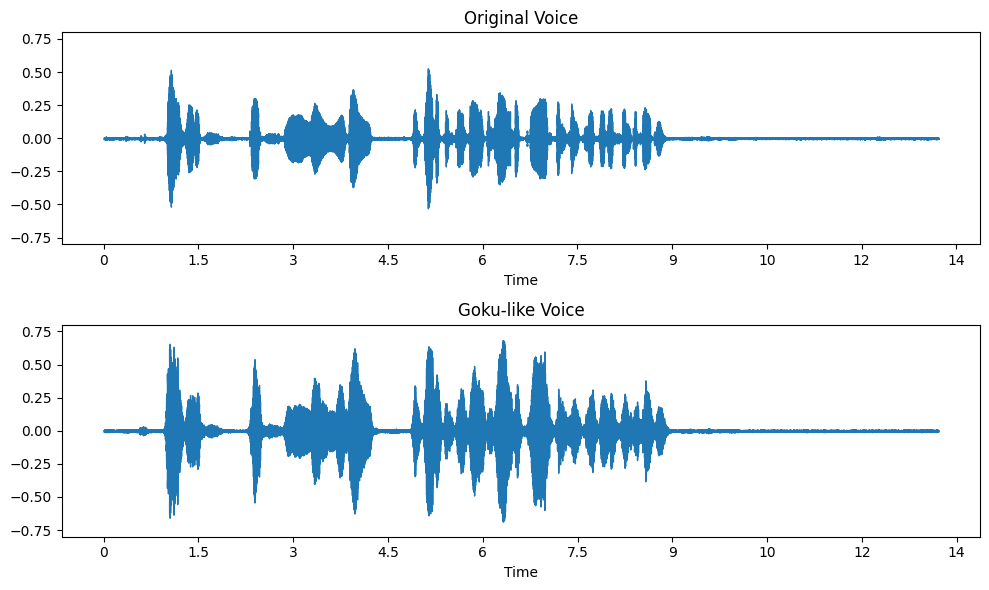

In [208]:
raw_y, raw_sr = load_data(neal_path)

plot_vs(raw_y, goku_y, raw_sr, goku_sr, "Goku")

In [209]:
save_audio('goku',goku_y,goku_sr)

saved file to modifiedAudio//goku.wav
